
### Lab Introduction

The lab content for this course will consist of a number of lab exercises that are designed to familiarise you with the course content and prepare you for the summative assignments. Each of the labs will have a practical and theoretical component and all work should be completed in the notebook provided. The labs are designed to be run on the university vLab server however can be run locally provided you have set up the appropriate Python environments. 

### Lab 1

In this lab exercise, we will introduce the basics required for this module including image loading, output and manipulation. 

You will look at applying edge detectors to images and comparing two different methods. 

At this stage, we will assume that you are able to use Python, and understand its basic use. 

##### Introduction

First we will cover some basics regarding Python and Image Manipulation.

The first step is importing the required packages. In this assignment we will be using scikit-image, MatPlotLib and Numpy. We have also provided helper functions for displaying the images inline. Check that your environment is configured correctly by running the section below. If this section fails, refer to the README on how to set up the environment.

In [1]:
# Imports
import skimage
import scipy
from matplotlib import pyplot as plt
import numpy as np
import cv2
import math

In order to load images we use the imread function which is part of scikit-image. Images can be displayed using the show_rgb_image helper function. Read through this function to understand how it works. We can also see the raw image data by printing the variable using `print`. As can be seen, by default in Skimage image pixels are represented as bytes with a range of 0-255.

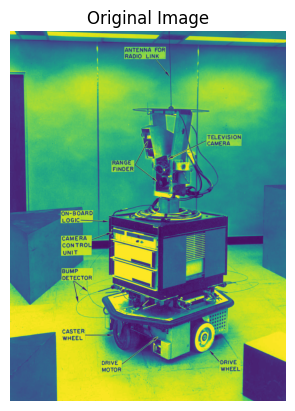

Shakey raw values [[254 254 254 ... 131 122 122]
 [254 254 254 ... 120 113 113]
 [254 254 254 ... 121 113 113]
 ...
 [ 83  81  78 ...  39  39  39]
 [ 83  81  78 ...  41  41  41]
 [ 83  81  78 ...  43  43  43]]


In [10]:
# Read image
shakey = skimage.io.imread('shakey.jpg')[:, :, 0] #Extract the Green Channel

# Display the image
plt.imshow(shakey)
plt.title("Original Image")
plt.axis('off')
plt.show()


print("Shakey raw values", shakey)

In scikit we perform convolution using the convolve2d function. Kernels can be defined as numpy arrays as seen below. A detailed guide to this function can be found here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

In [4]:
sobel_x = np.array(
    [[1,0,-1],
     [2,0,-2],
     [1,0,-1]])

sobel_y = np.array(
    [[1,2,1],
     [0,0,0],
     [-1,-2,-1]])

print(sobel_y)

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


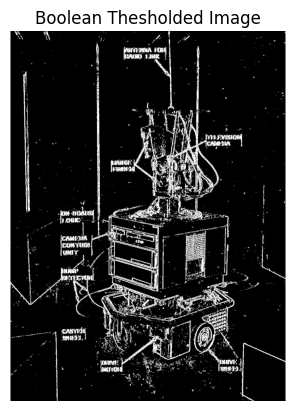

In [5]:
# Applying a filter
# We convert the output type to floats in order to preserve negative gradients
# We can also threshold the image using the > operator
threshold_shakey_sobel_x = abs(scipy.signal.convolve2d(shakey, sobel_x))>50

plt.imshow(threshold_shakey_sobel_x,cmap="gray")
plt.title("Boolean Thesholded Image")
plt.axis('off')
plt.show()

So far we have covered how to load images into Python, perform basic manipulation such as convolution and finally output images. The following tasks are designed to recap on content that has been covered in the Computer Vision module. Explore online documentation to implement the following tasks.

#### Task 1: Reimplement the the block above using OpenCV

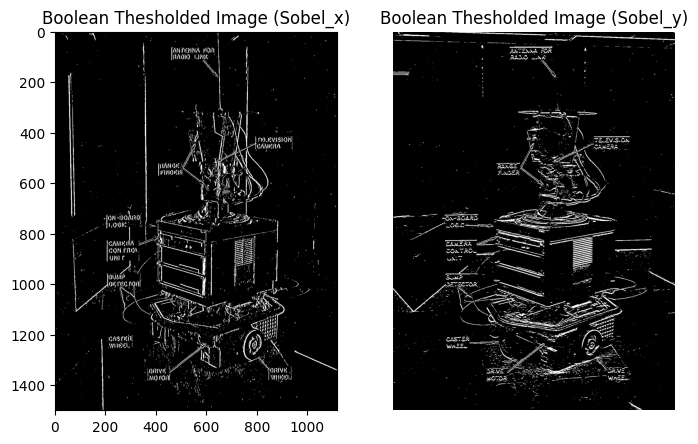

In [ ]:
## Apply the filter using OpenCV
sobel_x = cv2.Sobel(shakey, ddepth=cv2.CV_8U, ksize=3, dx=1, dy=0) > 50
sobel_y = cv2.Sobel(shakey, ddepth=cv2.CV_8U, ksize=3, dx=0, dy=1) > 50

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
ax1.imshow(sobel_x,cmap="gray")
ax1.set_title("Boolean Thesholded Image (Sobel_x)")

ax2.imshow(sobel_y,cmap="gray")
ax2.set_title("Boolean Thesholded Image (Sobel_y)")

plt.axis('off')
plt.show()

#### Task 2: Apply Canny Edge Detection to the original shakey image using both OpenCV and Scipy

Text(0.5, 1.0, 'Canny Edge Detector (OpenCV)')

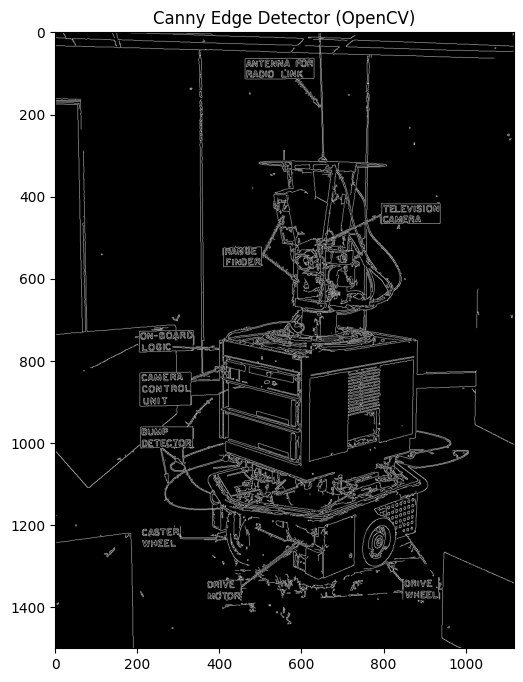

In [7]:
# Apply Canny Edge Detection OpenCV

# Hysterisis-based thresholding with threshold_low = 100 and threshold_high = 150

threshold_low = 50
threshold_high = 200
canny_img = cv2.Canny(shakey, threshold_low, threshold_high)

_, ax = plt.subplots(figsize=(8,8))
ax.imshow(canny_img, cmap='gray')
ax.set_title("Canny Edge Detector (OpenCV)")

Text(0.5, 1.0, 'Canny Edge Detector (Scikit-Image)')

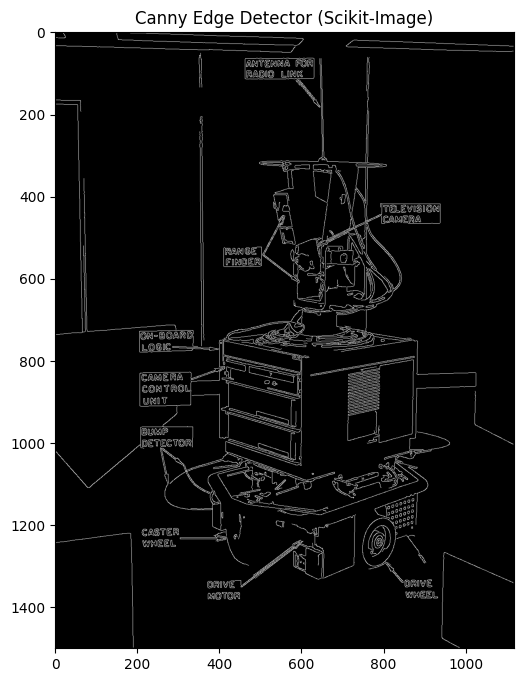

In [8]:
## Apply Canny Edge Detection Scipy
canny_img_sk = skimage.feature.canny(shakey, sigma=1, low_threshold=threshold_low, high_threshold=threshold_high)

_, ax = plt.subplots(figsize=(8,8))
ax.imshow(canny_img_sk, cmap='gray')
ax.set_title("Canny Edge Detector (Scikit-Image)")

#### Task 3: Apply Straight line hough transform to the canny image using either OpenCV or Scipy 

(1500, 1117)


Text(0.5, 1.0, 'Hough Lines')

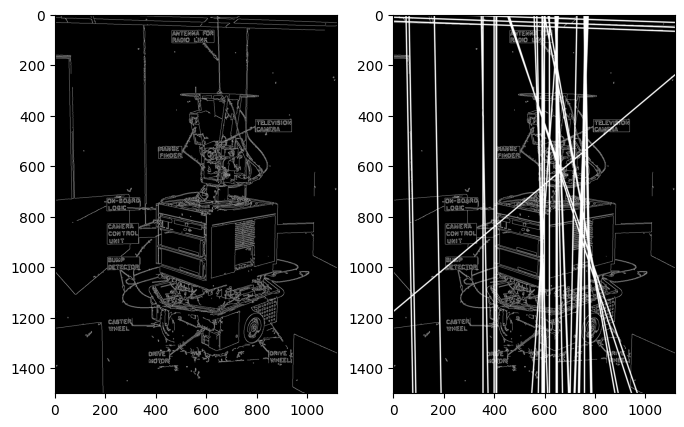

In [39]:
## Straight line hough transform
cp = np.copy(canny_img)

print(canny_img.shape)

# cv2.HoughLines returns the polar coordinates of detected lines as a list of (rho, theta) tuples.
lines = cv2.HoughLines(cp, 1, np.pi / 180, 230, None)

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 2000*(-b)), int(y0 + 2000*(a)))
        pt2 = (int(x0 - 2000*(-b)), int(y0 - 2000*(a)))
        cv2.line(cp, pt1, pt2, (255,255,255), 3, cv2.LINE_AA)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
ax1.imshow(canny_img, cmap='gray')
ax.set_title("Canny Edge Detector")

ax2.imshow(cp, cmap='gray')
ax.set_title("Hough Lines")
    



# Questions

Since there has only been one week of teaching, these questions primarily pertain to content from the previous computer vision module. If you are not familiar with these topics, please research them online. Write 2-3 sentences per answer.

#### Why is Gaussian smoothing typically applied before detecting edges in the Canny algorithm?

The Canny algorithm is a multi-stage algorithm that takes advantage of the benefits of lowpass and highpass filters. It applies a lowpass filter (gaussian blur) to smoothen out and reduce noise in the image before passing it the next steps in the algorithm to take advantage of the highpass filtering techniques which are more sensitive to noise. This enables canny edge detectors to avoid spurious edges and make more accurate and precise prediction of actual edges within the image. 

#### What are some practical applications of the Canny edge detection algorithm in real-world scenarios?

1. Image Segmentation: Canny edge detector is particularly useful in seperating or objects in an image from the background.
2. Object Detection.
3. Medical Imaging (Image registration). 

#### How would you implement convolution for large images efficiently?

This is largely dependent on the kernel operator and kernel size that is used to convolve the image. If the kernels are seperable, we can split the filtering operation into two separate 1D operations, apply filter along the x-axis and filter along the y-axis. This is much more efficient than convolving the image with large kernels, as this can take up memory and significantly slow down computation. 